# **<center>Técnicas de Clustering en Segmentación</center>**
***<center>ALÍ SAÚL ROJAS VALERO</center>***
*<center>arojasval@unsa.edu.pe</center>*


Descripción: **Comparación de diferentes técnicas de Clustering (clasificación) para la Segmentación de Imágenes.**

El presente trabajo aplica diferentes técnicas de Clustering disponibles en SKLearn para tratar de segmentar correctamente la fotografía de una impresora sobre un mueble con una pared que contraste sus colores.

![HISPANDINO](https://raw.githubusercontent.com/ASAROVA/PGK/Final/impre_320_240.JPG "Titulo")

Las características a ser usadas como entradas para la clasificación son los 3 valores de rojo, verde y azul que tiene cada pixel de la imagen.




## Inclusión de las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets
from sklearn.datasets import make_blobs
from pandas import DataFrame

## Importación de la imagen a ser tratada y adaptación de los datos

La imagen se importa como una matriz de dimensiones largo x ancho x 3 (los 3 canales RGB). Es necesario redimensionar dicha matriz a (largo*ancho) x 3 

(240, 320, 3)
(76800, 3)
[[156 191 245]
 [154 189 243]
 [154 189 243]
 ...
 [148 181 216]
 [147 180 213]
 [145 178 211]]


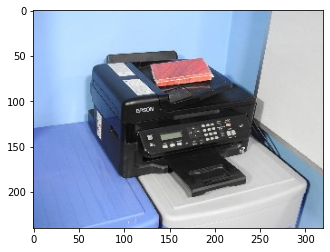

In [4]:
from skimage import io
imagen = io.imread('https://raw.githubusercontent.com/ASAROVA/PGK/Final/impre_320_240.JPG')
print(imagen.shape)

largo,ancho,canales = imagen.shape;

imagen_columna = imagen.reshape(-1,3);
print(imagen_columna.shape)
print(imagen_columna)

plt.imshow(imagen)


## KMeans

La técnica de KMeans utiliza como único parámetro de clasificación la proximidad entre las características de los elementos. Esto origina un resultado medianamente aceptable, pero con bastante discontinuidad entre los detalles del mismo objeto, debido por ej. a efectos de la iluminación.

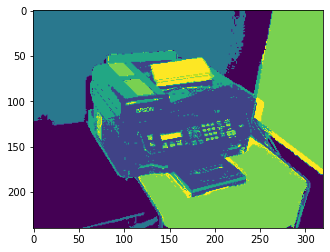

In [5]:
pred_kmeans = cluster.KMeans(n_clusters=6, random_state=170).fit_predict(imagen_columna)
pred_kmeans = pred_kmeans.reshape(240,320)
plt.imshow(pred_kmeans)

## DBSCAN

DBScan tiene como principal criterio de clasisficación la continuidad entre las clases que va formando. Esto es deseable en buena medida, pero ocasiona un serio problema en los bordes de los objetos, pues los diferentes formatos de imágenes al ser guardados, para comprimir el espacio, diluyen la diferencia que existe entre 2 areas con diferentes colores. Esto impide separar convenientemente a DBSCAN y origina un resultado muy confuso.

<class 'sklearn.cluster._dbscan.DBSCAN'>


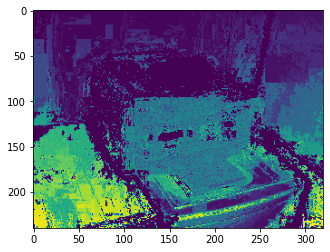

In [6]:
pred_db = cluster.DBSCAN(eps=0.2, min_samples=5).fit(imagen_columna)
print(type(pred_db))
pred_db2 = pred_db.labels_.astype(np.int)
pred_db2 = pred_db2.reshape(240,320)
plt.imshow(pred_db2)

## MeaShift

Esta técnica usa con igual importancia tanto la proximidad de las características como su continuidad. Esto le permite a MeaShift hacer una segmentación bastante eficiente de los bojetos, pese a los efectos de iluminación y otros:

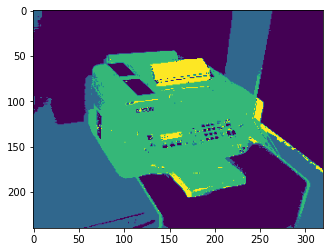

In [7]:
bandwidth = cluster.estimate_bandwidth(imagen_columna, quantile=0.2, n_samples=5000)
pred_ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(imagen_columna)
pred_ms2 = pred_ms.labels_.astype(np.int)
pred_ms2 = pred_ms2.reshape(240,320)
plt.imshow(pred_ms2)

## MPL

Se intentó también hacer una clasificación mediante MPL, entrenando al perceptrón con pequeños segmentos de cada area que se deseaba segmentar. Los resultados no son tan convenientes.

In [ ]:
#etiquetas
cuaderno, impresora, pared, pizarra, mueble_azul, mueble_gris = range(6)
0,        1,         2,     3,       4,           5,
print(cuaderno, impresora, pared, pizarra, mueble_azul, mueble_gris)

#np.full((3, 5), 7)
#numpy.array(n * [value])

cu = io.imread('cuaderno.png').reshape(-1,3);    eti_cu = np.array(cu.shape[0]*[cuaderno]);     print(cu.shape, eti_cu.shape);
im = io.imread('impresora.png').reshape(-1,3);   eti_im = np.array(im.shape[0]*[impresora]);    print(im.shape, eti_im.shape);
im2= io.imread('impresora2.png').reshape(-1,3);  eti_im2= np.array(im2.shape[0]*[impresora]);   print(im2.shape,eti_im2.shape);
pa = io.imread('pared.png').reshape(-1,3);       eti_pa = np.array(pa.shape[0]*[pared]);        print(pa.shape, eti_pa.shape);
pi = io.imread('pizarra.png').reshape(-1,3);     eti_pi = np.array(pi.shape[0]*[pizarra]);      print(pi.shape, eti_pi.shape);
ma = io.imread('mueble_azul.png').reshape(-1,3); eti_ma = np.array(ma.shape[0]*[mueble_azul]);  print(ma.shape, eti_ma.shape);
mg = io.imread('mueble_gris.png').reshape(-1,3); eti_mg = np.array(mg.shape[0]*[mueble_gris]);  print(mg.shape, eti_mg.shape);

entrenos = np.concatenate((cu,im,im2,pa,pi,ma,mg))
etiquetas = np.concatenate((eti_cu,eti_im,eti_im2,eti_pa,eti_pi,eti_ma,eti_mg))
print(entrenos.shape, etiquetas.shape)

0 1 2 3 4 5
(135, 3) (135,)
(126, 3) (126,)
(70, 3) (70,)
(160, 3) (160,)
(294, 3) (294,)
(209, 3) (209,)
(216, 3) (216,)
(1210, 3) (1210,)


[2 2 2 ... 2 2 2]


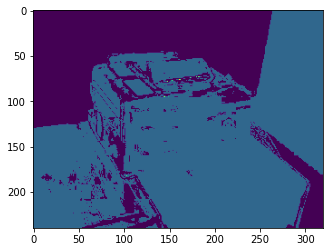

In [ ]:
from sklearn.neural_network import MLPClassifier
# all parameters not specified are set to their defaults
perceptron = MLPClassifier ( solver='sgd', hidden_layer_sizes=(25), \
                             activation='logistic',max_iter=500,    \
                             early_stopping=True, verbose=False,    \
                             random_state=0                         )

perceptron.fit (entrenos, etiquetas)

pred_mpl = perceptron.predict(imagen_columna)

print(pred_mpl)
pred_mpl = pred_mpl.reshape(240,320)
plt.imshow(pred_mpl)